# Problem Set 6

## Problem 1

Given the data:

| | | | | |
|---|---|---|---|---|
| $x_i$ | 0 | 1 | 2 | 3 | 5
| $y_i$ | 1 | 3 | 3 | 4 | 6

**(a)** Find the best linear fit by solving the $2 \times 2$ normal system by hand $A^T Au = A^T b$, with $A = \begin{bmatrix}x^T & 1\end{bmatrix}$ and $b = y^T$. Plot the data and the fit.  

**(b)** Calculate the Moore-Penrose pseudo-inverse $A^+$ of $A$ directly from its definition.  

**(c)** Write down the SVD of $A^+$.  

**(d)** What is the error $e$ of the approximation and its 2-norm?

### Solution

#### (a)

Firstly, let's construct the normal equation:

$$
x = 
\begin{bmatrix}
0\\1\\2\\3\\5
\end{bmatrix}
,\hspace{3mm}

y =
\begin{bmatrix}
1\\3\\3\\4\\6
\end{bmatrix}
,
\hspace{3mm}

A = 
\begin{bmatrix}
0 & 1\\
1 & 1\\
2 & 1\\
3 & 1\\
5 & 1
\end{bmatrix}
,
\hspace{3mm}
A^TA =
\begin{bmatrix}
14 & 6\\
6 & 4
\end{bmatrix}
$$

Now we can write that

$$
\begin{bmatrix}
39 & 11\\
11 & 5
\end{bmatrix} u =
\begin{bmatrix}0 & 1 & 2 & 3 & 5\\1 & 1 & 1 & 1 & 1\end{bmatrix} y
=
\begin{bmatrix}0 & 1 & 2 & 3 & 5\\1 & 1 & 1 & 1 & 1\end{bmatrix}
\begin{bmatrix}
1\\3\\3\\4\\6
\end{bmatrix}
=
\begin{bmatrix}51 \\ 17 \end{bmatrix}.
$$

Then we solve the system of linear equations for $u$ ($a$ and $d$):

$$
\begin{cases}
39a + 11d = 51\\
11a + 5d = 17
\end{cases}
$$

We see that $det(A^TA) = 74 \neq 0$, thus, we have a single solution:

$$
u = 
\begin{bmatrix}
34/37\\
51/37
\end{bmatrix},
$$

and the best linear fit would be

$$
\hat{y} = au = \begin{bmatrix}x & 1 \end{bmatrix} \begin{bmatrix} 34/37 \\ 51/37 \end{bmatrix} = \frac{1}{37}(34x + 51)
$$

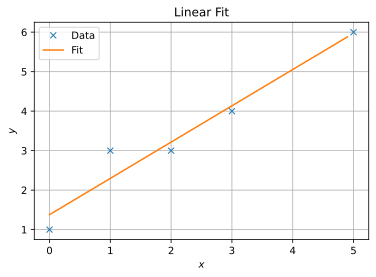

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

a = 34
d = 51

x1 = [0, 1, 2, 3, 5]
y1 = [1, 3, 3, 4, 6]

x = np.arange(0, 5, 0.1)
y = 1/37*(a*x + d)

plt.plot(x1, y1, lw=0, marker='x')
plt.plot(x, y)
plt.legend(('Data', 'Fit'))
plt.title('Linear Fit')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid()

#### (b)

The definition of Moore-Penrose pseudo-inverse is as follows:

$$
A^+ = (A^TA)^{-1}A^T
$$

Let's perform some calculations:

In [56]:
import sympy as sp
import numpy as np

x = sp.Matrix([0, 1, 2, 3, 5])
y = sp.Matrix([1, 3, 3, 4, 6])

ones = sp.ones(5, 1)
A = x.row_join(ones)

Aplus = (A.T * A).inv() * A.T
Aplus_disp = sp.MatMul(sp.gcd(tuple(Aplus)), Aplus / sp.gcd(tuple(Aplus)), evaluate=False)
Aplus_disp


(1/74)*Matrix([
[-11, -6, -1, 4,  14],
[ 39, 28, 17, 6, -16]])

This is our Moore-Penrose pseudo-inverse $A^+$.

#### (c)

Now let's find SVD of $A^+$:

In [75]:
svd = Aplus.singular_value_decomposition()

Here we get $U$:

In [76]:
svd[0].evalf()

Matrix([
[0.959054262581672, -0.283222388634664],
[0.283222388634664,  0.959054262581672]])

$\Sigma$:

In [59]:
svd[1].evalf()

Matrix([
[0.153848963697702,                 0],
[                0, 0.755595851605696]])

$V$:

In [60]:
svd[2].evalf()

Matrix([
[0.0435734709874309,  0.724657422271472],
[ 0.191122975415485,  0.510655760337264],
[  0.33867247984354,  0.296654098403056],
[ 0.486221984271594, 0.0826524364688476],
[ 0.781320993127703, -0.345350887399569]])

#### (d)

To find the error vector, we simply substract the fit vector from the data vector:

In [8]:
a, d = sp.symbols('a, d')

u = sp.Matrix([a, d])

subs = sp.solve(A.T*A*u - A.T*y)

yhat = A*u.subs(subs)

e = y - yhat
e_disp = sp.MatMul(sp.gcd(tuple(e)), e / sp.gcd(tuple(e)))
e_disp

(1/37)*Matrix([
[-14],
[ 26],
[ -8],
[ -5],
[  1]])

And $||e||_2$ is:

In [9]:
e.norm()

sqrt(962)/37

## Problem 2

Find the best plane in $\mathbb{R}^3$, in the least-square sense, through the data given in the table:

| | | | | | |
|---|---|---|---|---|---|
|$x_i$|1|1|2|3|5|
|$y_i$|5|3|4|10|7|
|$z_i$|2|1|2|5|5|

What is the error vector and its norm?

## Solution

The plane equation looks as follows:

$$
ax + by + cz + d = 0
$$

In our case, this equation will define the form of the fit:

$$
ax + by + d = -cz
$$

Or, in matrix form:

$$
\begin{bmatrix}
x & y & 1
\end{bmatrix}
\begin{bmatrix}
a \\
b \\
d
\end{bmatrix}
=
-c
\begin{bmatrix}
\hat{z}
\end{bmatrix},
$$

where $x$, $y$ are the argument vectors and $\hat{z}$ is a fit vector.

The matrix $A$ and the vector $u$ should look like this:

$$
A = 
\begin{bmatrix}1 & 5 & 1\\1 & 3 & 1\\2 & 4 & 1\\3 & 10 & 1\\5 & 7 & 1\end{bmatrix}, \hspace{3mm}
u = 
\begin{bmatrix}
a\\
b\\
d
\end{bmatrix}
$$

and the normal equation takes the form of:

$$
A^TAu = -cA^Tz
$$

 Thus, we can find the pseudo-inverse $(A^TA)^{-1}A^T$ and multiply from right side both sides of the equation to instantly find $u$.

```{note}
We should move the coefficient $c$ to the left and put it into the vector $u$:

$$
A^TA\hat{u} = A^Tz; \\
u = 
\begin{bmatrix}
a/c\\
b/c\\
1/c
\end{bmatrix}.
$$

Then we name the new coefficients $\hat{a}, \hat{b}, \hat{d} = -a/c, -b/c, -d/c$ respectively and call it a day!
```

In [10]:
x = sp.Matrix([1, 1, 2, 3, 5])
y = sp.Matrix([5, 3, 4, 10, 7])
z = sp.Matrix([2, 1, 2, 5, 5])

ones = sp.ones(5, 1)

A = x.row_join(y.row_join(ones))

A.pinv() #(A.T * A)^(-1) * A^T

u = A.pinv()*z
u = (A.T*A).inv()*A.T*z
u


Matrix([
[ 611/1075],
[ 437/1075],
[-776/1075]])

Although we omitted the coefficient $c$, the result beautifullty transforms to 

$$
611x + 437y + -776 = 1075z
$$

Let's plot the result:

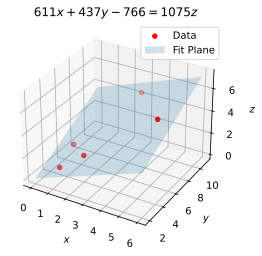

In [12]:
%config InlineBackend.figure_format = 'svg'

x = list(x)
y = list(y)
z = list(z)

X = np.linspace(0, 6, 10)
Y = np.linspace(2, 11, 10)

X, Y = np.meshgrid(X, Y)

u = np.array(u)

Z = X*u[0] + Y*u[1] + u[2]
Z = np.array(Z, dtype=np.float64)


ax = plt.subplot(projection='3d')
ax.scatter(x, y, z, color='red', label='Data')
s = ax.plot_surface(X, Y, Z, alpha=0.2, label='Fit Plane')
s._facecolors2d = s._facecolor3d
s._edgecolors2d = s._edgecolor3d
ax.legend()
ax.set_title('$611x + 437y -766 = 1075z$')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
tmp = ax.set_zlabel('$z$')

```{warning}
Nice!
```

The error vector is found by subtracting the vector $\hat{z}$ from $z$:

$$
e = Au - z =
$$

In [21]:
x = sp.Matrix(x)
y = sp.Matrix(y)
z = sp.Matrix(z)
u = sp.Matrix(u)
A = x.row_join(y.row_join(sp.ones(5, 1)))

zhat = A*u
e = z-zhat
e_disp = sp.MatMul(sp.gcd(list(e)), e/sp.gcd(list(e)))
e_disp

(1/1075)*Matrix([
[130],
[-71],
[-44],
[-52],
[ 37]])

And the error norm is

In [23]:
e.norm()

sqrt(1118)/215

## Problem 3

Determine the dominant nodes in the function $f$ of space $x$ and time $t$:

$$
f(x, t) = e^{-x^2} \sin{(x + 3t)} \cos{(x - t)},
$$

considering the interval $x \in [-5, 5], t \in [0, 10]$.

**(a)** Plot the singular values in uniform as well as semilog scales. 

**(b)** Plot the solution in the $x-t$ plane over the given interval. 

**(c)** How much "energy" of the solution is contained in mode $1$ and in modes $1 + 2$?  

**(d)** Split the first two columns of $U$ and $V$ in the SVD of matrix $F$ obtained by calculating $f(x, t)$ over a grid with $100$ points in $x$ and $50$ points in $t$. Explain their meaning.

### Solution

Let's perform the discretization and construct the matrix $F$:

In [49]:
#x, t = sp.symbols('x, t')

#f = sp.exp(-sp.Pow(x, 2))*sp.sin(x + 3*t)*sp.cos(x - t)
#f = sp.Function('f')(x, t)

X = np.linspace(-5, 5, 100)
T = np.linspace(0, 10, 50)

X, T = np.meshgrid(X, T)

f = lambda x, t: np.exp(-np.power(x, 2)) * np.sin(x + 3*t) * np.cos(x - t)

F = f(X, T)
np_svd = np.linalg.svd(F)
np_svd[1]

array([1.08046335e+01, 5.82627849e+00, 3.17310532e+00, 7.98369254e-15,
       5.19757831e-15, 3.07358728e-15, 2.75735915e-15, 1.95441709e-15,
       1.28022240e-15, 1.23305341e-15, 1.07531702e-15, 1.07531702e-15,
       1.07531702e-15, 1.07531702e-15, 1.07531702e-15, 1.07531702e-15,
       1.07531702e-15, 1.07531702e-15, 1.07531702e-15, 1.07531702e-15,
       1.07531702e-15, 1.07531702e-15, 1.07531702e-15, 1.07531702e-15,
       1.07531702e-15, 1.07531702e-15, 1.07531702e-15, 1.07531702e-15,
       1.07531702e-15, 1.07531702e-15, 1.07531702e-15, 1.07531702e-15,
       1.07531702e-15, 1.07531702e-15, 1.07531702e-15, 1.07531702e-15,
       1.07531702e-15, 1.07531702e-15, 1.07531702e-15, 1.07531702e-15,
       1.07531702e-15, 1.07531702e-15, 1.07531702e-15, 1.07531702e-15,
       1.07531702e-15, 1.07531702e-15, 1.07531702e-15, 1.07531702e-15,
       1.07531702e-15, 3.30240645e-16])

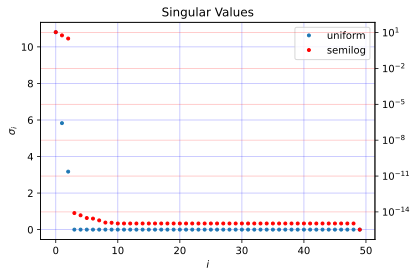

In [94]:
fig, ax = plt.subplots(1, 1)
uniform = ax.plot(np_svd[1], label='uniform', lw=0, marker='.')

ax2 = ax.twinx()

ax2.set_yscale('log')
semilog = ax2.plot(np_svd[1], color='red', label='semilog', lw=0, marker='.')
lines = uniform + semilog
labels = [l.get_label() for l in lines]
ax.legend(lines, labels)

plt.title('Singular Values')
ax.set_xlabel('$i$')
ax.set_ylabel('$\sigma_i$')
ax.grid(color='blue', alpha = 0.25)
ax2.grid(color='red', alpha = 0.25)

#### (b) 

If by "solution" we understand the function itself, then the plot is down below:

Text(0.5, 0, '$f(x, t)$')

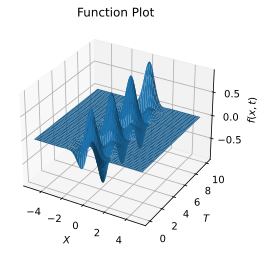

In [102]:
ax3 = plt.subplot(projection='3d')
ax3.plot_surface(X, T, F)
ax3.set_title('Function Plot')
ax3.set_xlabel('$X$')
ax3.set_ylabel('$T$')
ax3.set_zlabel('$f(x, t)$')

#### (c)

By the "energy" we understand the term $E_i = \frac{\sigma_i}{\sum\limits_{k=1}^{n}{\sigma_k}}$. By the "energy" of $k$ we understand the "energy" of $k^{th}$ expansion: $E_k = \frac{\sum\limits_{i=1}^{k}{\sigma_i}}{\sum\limits_{i=1}^{n}{\sigma_i}}$.

So,

In [123]:
sigmas = np_svd[1]

e1 = np.max(sigmas) / np.sum(sigmas)
e12 = np.sum(sigmas[0:2]) / np.sum(sigmas) #from numpy the sigmas come sorted already

print('E1: {}'.format(e1))
print('E12: {}'.format(e12))

E1: 0.5455778666776585
E12: 0.8397746647151946


#### (d)
When we SVD the matrix $F$, obtained as a discretized calculation of $f(x, t)$ over a meshgrid $(X, T)$, we get the $U$ and $V$ matrices containing the left and right singular vectors. These vectors are the components of the function factorization corresponding to their singular values. The first two columns of $U$ and $V$ will correspond to the first two largest singular values, thus, these "vectors" will carry the most "energetic" part of the function. In other words, when we reduce the information, such a reduction will preserve the most valuable information.

Text(0.5, 0, '$f_{red}(x, t)$')

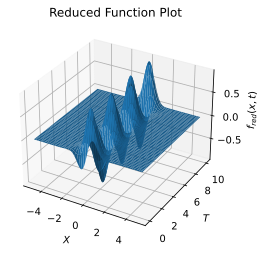

In [134]:
U, S, V = np_svd
U_red = U[:, 0:2]
V_red = V.T[:, 0:2]
S_red = S[0:2]

F_red = np.dot(U_red, np.dot(np.diag(S_red), V_red.T))

ax4 = plt.subplot(projection='3d')
ax4.plot_surface(X, T, F_red)
ax4.set_title('Reduced Function Plot')
ax4.set_xlabel('$X$')
ax4.set_ylabel('$T$')
ax4.set_zlabel('$f_{red}(x, t)$')

As we can see, we preserved the most valuable information from the function as it barely differs from the plot of the "full" function.

## Problem 4

To find a root of $f(x) = 0$, Newton's method tells to start with some initial guess $x_0$ and then to iterate following the scheme: $x_{n+1} = x_{n} - f(x_n) / f'(x_n)$.

**(a)** Use this method to find the root $x = 1$ of $f(x) = x^2 - 1$.  

**(b)** What is the range of initial conditions $x_0$ that give convergence to $x = 1$?  

**(c)** How fast do the iterations converge? Plot the error $e_n = |x_n - 1|$ as a function of $n$ (maybe, in log scale).

### Solution

#### (a, b, c)

Okay...

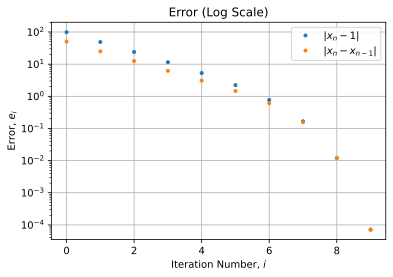

In [226]:
x = sp.symbols('x')
f = sp.Function('f')

f = f(x)
f = x**2 - 1
f_dif = f.diff(x)



n = 50 #1000 steps
errors = np.zeros(n)
deltax = np.zeros(n)
x_prev = 100 #x_0
for i in range(n):
    errors[i] = np.abs(x_prev - 1) #we know the root is x_r = 1
    xn = x_prev - f.subs({x: x_prev}).evalf() / f_dif.subs({x: x_prev}).evalf()
    deltax[i] = np.abs((xn - x_prev))
    if (x_prev == xn):
        break
    else:
        x_prev = xn
    max_i = i

ax5 = plt.subplot()
ax5.set_yscale('log')
#ax5.set_xscale('log')
ax5.plot(np.arange(max_i), errors[:max_i], marker='.', lw = 0, label='$|x_n - 1|$')
ax5.set_title('Error (Log Scale)')
ax5.set_xlabel('Iteration Number, $i$')
ax5.set_ylabel('Error, $e_i$')
ax5.plot(np.arange(max_i), deltax[:max_i], marker='.', lw = 0, label='$|x_n - x_{n-1}|$')
ax5.grid()
ax5.legend()

The root of the equation we obtain throuth iteration method is:

In [227]:
xn

1.00000000000000

The error is so low that python interprets this number as a strict $x = 1$, which is nice.

This function has continuous derivatives $f'_x$ and $f''_{xx}$. The function definition scope is $x \in \mathbb{R}$, so the method will give the convergence to any of the roots at any arbitrary $x_0 \in \mathbb{R} \ 0$. The latter requires explanation.

```{note}
If we don't check if $f'(x_n) = 0$ at any $x_n$, then choosing the $x_0 = 0$ means we are causing the next iteration to shoot to the infinity. So, with the named check the convergence interval will be $x_0 \in \mathbb{R}$.
```

For more detailed information on convergence conditions we should refer to Kantorovich theorem.


The method gives quadratic convergence. However, this may vary from function to function, as some features change (e.g. $f''(x_{root}) = 0$ or $\nexists$).

```{note}
When we don't know the real root, is is better to plot the error $|x_n - x_{n-1}|$ to see if the found value converges to some finite value. This is plotted on the graph as an orange line.
```

## Problem 5

Now apply the same Newton iterations as in the previous problem to the equation $f(x) = x^2 + 1 = 0$. Clearly, this equation has no real roots.

**(a)** The question is: What do the iterations do? Do they converge to anything?  

**(b)** How does the behaviour of the iterations depend on the initial point $x_0$?  

**(c)** What if you start the iterations in the complex plane? Can you get the convergence to the actual roots $\pm i$ of the equation? What are the domains of attraction of the roots?


### Solution


0.608706379537147


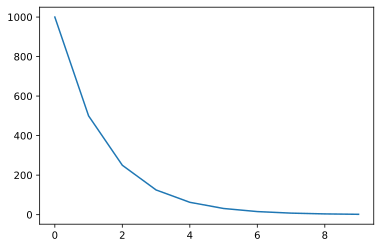

In [232]:
x = sp.symbols('x')
f = sp.Function('f')
f = x ** 2 + 1
f_dif = f.diff(x)
x0 = 1000
n = 1000
iters = np.zeros(n)
def iter(x_prev, f, n):
    for i in range(n):
        max_i = i
        iters[i] = x_prev
        subs = {x: x_prev}
        xn = x_prev - f.subs(subs).evalf() / f_dif.subs(subs).evalf()
        if (xn.is_infinite):
            break
        else:
            x_prev = xn
    return x_prev
        

x_r = iter(x0, f, 10)
print(x_r)
plt.plot(np.arange(max_i), iters[:max_i])

#### (a)

It is clear that there would be no convergence: due to the form of the graph, we will approach the lowest point of the function $f(0) = 1$, from which the next iteration will shoot to either of two infinities (plus or minus) because the $f'(x)$ term will be almost zero, thus, the fraction will be almost $\infty$.


#### (b)

If we take the initial point $x_{0} = 0$, we will instantly get the infinity as the next approximation. As we go further from the global minimum, we will just need more iterations to get close to $0$, where the scenario described in **(a)** will come into play.


#### (c)

Let us move to the complex plane: $x = a + bi$

In [202]:
a, b, x = sp.symbols('a, b, x')
x = a + b * sp.I
subs = {x: a + b * sp.I}
f = x**2 + 1

SyntaxError: invalid syntax (Temp/ipykernel_13296/2185625000.py, line 5)


#### (a)

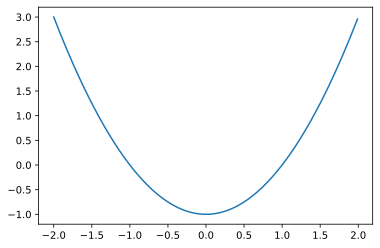

In [223]:
axt = plt.subplot()
#axt.set_yscale('log')
xxx = np.arange(-2, 2, 0.01)
axt.plot(xxx, xxx**2 - 1)

## Problem 6

Consider the function $f = 2x^2 + 2xy + y^2 - x - 2y$.

**(a)** Find its minimum analytically by representing $f$ as $\frac{1}{2}u^TAu - b^Tu$. Plot the function together with its contour levels using, for example, **surfc** function in Matlab.  

**(b)** Now find the minimum using the gradient descent. Determine the step $\tau$ in the descent method.  

**(c)** Starting with $(x_o, y_o) = (0, 4)$, calculate the first two steps of the gradient explicitly and indicate on a single plot both the positions and the gradient vectors at those positions. Also plot the level curves of $f$ going through these points.  

**(d)** Implement the descent algorithm in Matlab or Python and starting with the same initial conditio as in **(c)** find the minimum within a tolerance of $tol = 10^{-6}$. how many iterations does it take to reach the minimum? 

### Solution

#### (a)

$$
f = \frac{1}{2}u^TAu - b^Tu;\\
\hspace{3mm}\\
u = 
\begin{bmatrix}
x \\
y
\end{bmatrix}
,\hspace{3mm}
A =
\begin{bmatrix}
2 & 1\\
1 & 2
\end{bmatrix}
,\hspace{3mm}
b = 
\begin{bmatrix}
1 \\
2
\end{bmatrix}
$$

In [246]:
x, y = sp.symbols('x, y')

u = sp.Matrix([x, y])
A = sp.Matrix([[2, 1], [1, 2]])
b = sp.Matrix([1, 2])

s = (u.T*A*u - b.T*u)
ss = s[0].expand()
ss

2*x**2 + 2*x*y - x + 2*y**2 - 2*y